# Basic Diagram Examples

In [ ]:
#| default_exp serialize

In [ ]:
# | hide
%load_ext autoreload
%autoreload 2


## Imports

In [ ]:
#| export
import os

from networkx.readwrite import json_graph
import json
from typing import Any

from stringdale import Define,Scope,V,E,Diagram,DiagramSchema

from stringdale.base import _get_func_name
from stringdale.core import  checkLogs
from stringdale.viz import draw_nx


In [ ]:
def plus(x,y):
    return x+y

# EXPLAIN start and end are by default
# with checkLogs(name='__main__'):
with Define('multiedge',type='flow') as D:

    V('plus',plus,
        inputs=[
        'Start(x=a,y=b)',
        ],
        outputs=['End']
        )
    


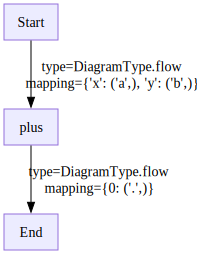

In [ ]:
draw_nx(D.graph)

In [ ]:
node_link_data = json_graph.node_link_data(D.graph,edges='edges')
node_link_data

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 'plus'}, {'id': 'Start'}, {'id': 'End'}],
 'edges': [{'type': <DiagramType.flow: 'flow'>,
   'mapping': {0: ('.',)},
   'source': 'plus',
   'target': 'End'},
  {'type': <DiagramType.flow: 'flow'>,
   'mapping': {'x': ('a',), 'y': ('b',)},
   'source': 'Start',
   'target': 'plus'}]}

In [ ]:
#| export
class Encoder(json.JSONEncoder):
    def default(self, obj: Any) -> str:
        # Handle objects that json.JSONEncoder doesn't know how to serialize
        try:
            # First try the default encoder
            return super().default(obj)
        except TypeError:
            # If that fails, convert to string
            if isinstance(obj,(Diagram,DiagramSchema)):
                return str(obj)
            elif isinstance(obj,set):
                return list(obj)
            elif isinstance(obj,tuple):
                return list(obj)
            elif callable(obj):
                return _get_func_name(obj)
            else:
                return str(obj)

# Example usage:
def serialize_to_json(obj: Any) -> str:
    return json.dumps(obj, cls=Encoder,indent=2)

In [ ]:
print(serialize_to_json(node_link_data))

{
  "directed": true,
  "multigraph": false,
  "graph": {},
  "nodes": [
    {
      "id": "plus"
    },
    {
      "id": "Start"
    },
    {
      "id": "End"
    }
  ],
  "edges": [
    {
      "type": "DiagramType.flow",
      "mapping": {
        "0": [
          "."
        ]
      },
      "source": "plus",
      "target": "End"
    },
    {
      "type": "DiagramType.flow",
      "mapping": {
        "x": [
          "a"
        ],
        "y": [
          "b"
        ]
      },
      "source": "Start",
      "target": "plus"
    }
  ]
}


## Export

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()